In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
data = pd.read_csv('bank/bank-full.csv',sep=';',encoding='UTF-8')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
subset = data[['age','job','marital','education','balance','housing','loan','duration','campaign','poutcome']]
labels = np.array(data['y'].str.lower().replace({'yes': 1, 'no': 0}))

In [6]:
#get key values
jobs =list(set(subset['job'])) 
educations = list(set(subset['education']))
marital = list(set(subset['marital']))
poutc = list(set(subset['poutcome']))


In [7]:
#enum: str to int
job_enum = [ jobs.index(item) for item in subset['job']]
educ_enum = [educations.index(item) for item in subset['education']]
mari_enum = [marital.index(item) for item in subset['marital']]
poutc_enum = [poutc.index(item) for item in subset['poutcome']]

In [8]:
#Insert enum arrays
subset.insert(loc=2, column='job_enum', value=job_enum)
subset.insert(loc=4, column='mari_enum', value=mari_enum)
subset.insert(loc=6, column='educ_enum', value=educ_enum)
subset.insert(loc=9, column='housing_enum', value=np.array(subset['housing'].str.lower().replace({'yes': 1, 'no': 0})))
subset.insert(loc=11, column='loan_enum', value=np.array(subset['loan'].str.lower().replace({'yes': 1, 'no': 0})))
subset.insert(loc=15, column='poutc_enum', value=poutc_enum)

In [9]:
subset.head(n=10)


,age,job,job_enum,marital,mari_enum,education,educ_enum,balance,housing,housing_enum,loan,loan_enum,duration,campaign,poutcome,poutc_enum
0,58,management,0,married,1,tertiary,2,2143,yes,1,no,0,261,1,unknown,0
1,44,technician,10,single,0,secondary,3,29,yes,1,no,0,151,1,unknown,0
2,33,entrepreneur,7,married,1,secondary,3,2,yes,1,yes,1,76,1,unknown,0
3,47,blue-collar,11,married,1,unknown,0,1506,yes,1,no,0,92,1,unknown,0
4,33,unknown,3,single,0,unknown,0,1,no,0,no,0,198,1,unknown,0
5,35,management,0,married,1,tertiary,2,231,yes,1,no,0,139,1,unknown,0
6,28,management,0,single,0,tertiary,2,447,yes,1,yes,1,217,1,unknown,0
7,42,entrepreneur,7,divorced,2,tertiary,2,2,yes,1,no,0,380,1,unknown,0
8,58,retired,1,married,1,primary,1,121,yes,1,no,0,50,1,unknown,0
9,43,technician,10,single,0,secondary,3,593,yes,1,no,0,55,1,unknown,0


In [10]:
features = subset[['age','job_enum','mari_enum','educ_enum','balance','housing_enum','loan_enum','duration','campaign','poutc_enum']]

In [11]:
features.head(n=10)

,age,job_enum,mari_enum,educ_enum,balance,housing_enum,loan_enum,duration,campaign,poutc_enum
0,58,0,1,2,2143,1,0,261,1,0
1,44,10,0,3,29,1,0,151,1,0
2,33,7,1,3,2,1,1,76,1,0
3,47,11,1,0,1506,1,0,92,1,0
4,33,3,0,0,1,0,0,198,1,0
5,35,0,1,2,231,1,0,139,1,0
6,28,0,0,2,447,1,1,217,1,0
7,42,7,2,2,2,1,0,380,1,0
8,58,1,1,1,121,1,0,50,1,0
9,43,10,0,3,593,1,0,55,1,0


In [12]:
matrix_features = features.as_matrix()


In [13]:
matrix_features.shape

(45211, 10)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(matrix_features, labels, test_size=0.3, random_state=40)

In [15]:
X_test.shape

(13564, 10)

In [16]:
X_train.shape

(31647, 10)

In [29]:
clf = LinearSVC(C=1e2)

In [30]:
clf.fit(X_train,y_train)

LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print("Testing Results...\n")
print(classification_report(y_test, y_pred))

print"accuracy:", accuracy_score(y_test, y_pred)

Testing Results...

             precision    recall  f1-score   support

          0       0.90      0.97      0.94     11965
          1       0.51      0.23      0.32      1599

avg / total       0.86      0.88      0.86     13564

accuracy: 0.8827779416101444


In [33]:
cm=confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[11600   365]
 [ 1225   374]]


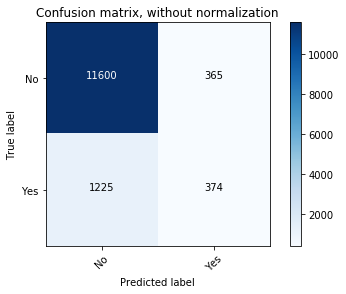

In [34]:
plot_confusion_matrix(cm, classes=['No','Yes'],
                      title='Confusion matrix, without normalization')

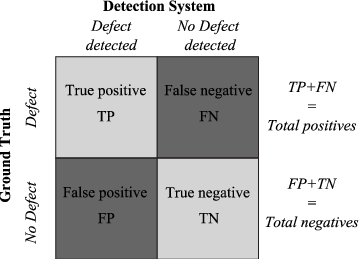

In [35]:
from IPython.display import Image
Image("https://www.researchgate.net/profile/Jocelyn_Chanussot/publication/220050677/figure/fig1/AS:340734260596738@1458248786925/The-confusion-matrix-represents-the-true-positive-and-the-false-positive-for-a-defect.png")